# Final Project_保費預測
IMLP343_黃聖貽

# Step 1: 載入所需的套件

In [30]:
## 導入Python的數據處理套件
import numpy as np
import pandas as pd
## 導入視覺化套件
import matplotlib.pyplot as plt
import seaborn as sns
## 導入Sklearn中的線性模組
from sklearn.linear_model import LinearRegression
## 將數據集分成訓練集與測試集的套件
from sklearn.model_selection import train_test_split



# Step 2: 載入資料

In [31]:
#使用kaggle網站中"Insurance Premium Data Health Insurance Premium charges based on Gender, BMI and other characteristics"資料
#https://www.kaggle.com/simranjain17/insurance/code
data = pd.read_csv('insurance.csv')
data


##欄位說明
#age
#sex-male=1, female=2
#bmi
#children
#smoker-yes=1, no=2
#region-northeast=1, northwest=2, southeast=3, southwest=4,
#charges-insurance payment

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


# Step 3: 使用heatmap套件尋找缺漏欄位

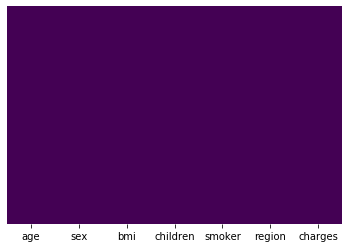

In [32]:
#探索資料
#用heatmap(.isnull()來找出缺失的資料在哪些欄位)
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

# Step 4: 資料前置處理

In [33]:
#用字典修改sex,smoker,region欄位內容
dict = {1:'male', 2:'female'}
data= data.replace({"sex": dict})
dict = {1:'yes', 2:'no'}
data= data.replace({"smoker": dict})
dict = {1:'northeast', 2:'southeast', 3:'northwest',4:'southwest'}
data= data.replace({"region": dict})

#使用pandas將sex,smoker,region從類別資料改換為數值變數(drop_first=False)
sex = pd.get_dummies(data['sex'],drop_first=False)
smoker = pd.get_dummies(data['smoker'],drop_first=False)
region = pd.get_dummies(data['region'],drop_first=False)

#將sex,smoker,region的數值變數和原始的data結合
data = pd.concat([data,sex],axis=1)
data = pd.concat([data,smoker],axis=1)
data = pd.concat([data,region],axis=1)
data.head()

,age,sex,bmi,children,smoker,region,charges,female,male,no,yes,northeast,northwest,southeast,southwest
0,19,female,27.900,0,yes,southwest,16884.92400,1,0,0,1,0,0,0,1
1,18,male,33.770,1,no,southeast,1725.55230,0,1,1,0,0,0,1,0
2,28,male,33.000,3,no,southeast,4449.46200,0,1,1,0,0,0,1,0
3,33,male,22.705,0,no,northwest,21984.47061,0,1,1,0,0,1,0,0
4,32,male,28.880,0,no,northwest,3866.85520,0,1,1,0,0,1,0,0


# Step 5: 繪圖

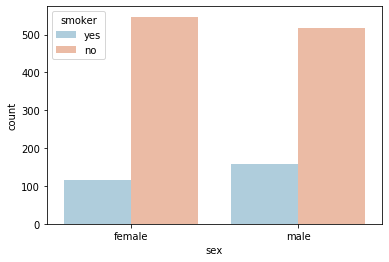

In [34]:
#用countplot來看男女是否抽菸的人數。
sns.countplot(x='sex',hue='smoker',data=data,palette='RdBu_r')

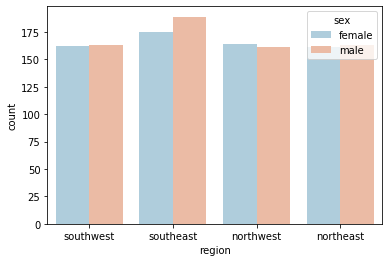

In [35]:
#用countplot來看不同地區男女人數。
sns.countplot(x='region',hue='sex',data=data,palette='RdBu_r')

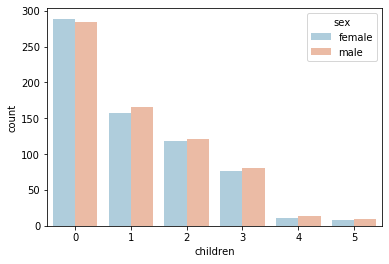

In [36]:
#用countplot來看擁有小孩數量的男女人數。
sns.countplot(x='children',hue='sex',data=data,palette='RdBu_r')

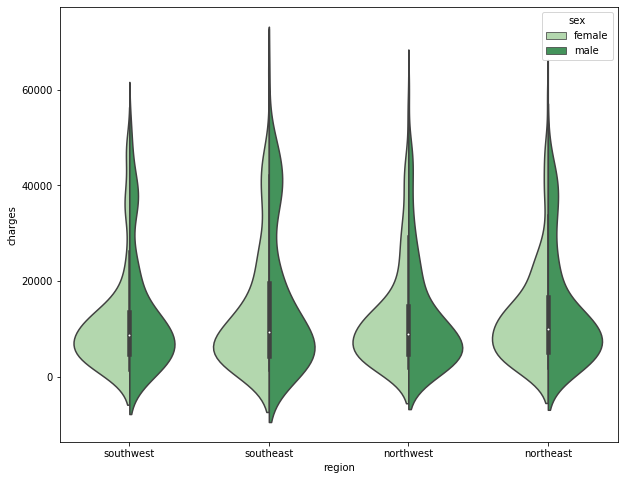

In [37]:
#用violinplot來看不同地區男女的保費分布
plt.figure(figsize=(10,8))
sns.violinplot(y='charges',x='region',hue='sex',data=data,split=True,palette='Greens')

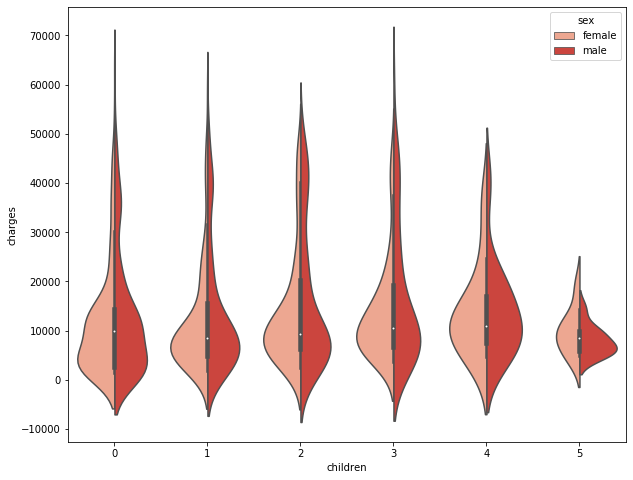

In [38]:
#用violinplot來看擁有的小孩數以及男女的保費分布
plt.figure(figsize=(10,8))
sns.violinplot(y='charges',x='children',hue='sex',data=data,split=True,palette='Reds')

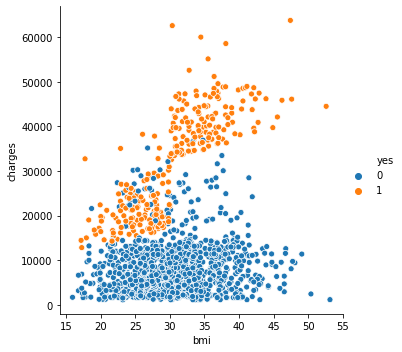

In [39]:
#用replot說明不同bmi以及是否抽菸的保費分布
sns.relplot(x='bmi',y='charges',hue='yes',data=data)
#從下圖可以看出沒有抽菸的人保費在15000以下
#有抽菸的人，BMI 30以下，保費集中在10000~30000
#有抽菸的人，BMI 30以上，保費集中在30000~50000

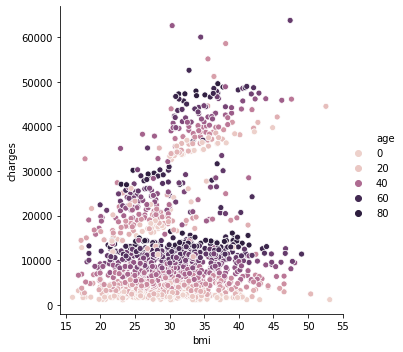

In [40]:
#用replot說明不同bmi以及年齡的保費分布
sns.relplot(x='bmi',y='charges',hue='age',data=data)
#從下圖可以看出，三個群組中年紀越大的人保費越高

# Step 6: 資料標準化

In [14]:
#drop掉sex,smoker,region等欄位
data.drop('sex',axis=1,inplace=True)
data.drop('smoker',axis=1,inplace=True)
data.drop('region',axis=1,inplace=True)
data.drop('northeast',axis=1,inplace=True)
data.drop('northwest',axis=1,inplace=True)
data.drop('southeast',axis=1,inplace=True)
data.drop('southwest',axis=1,inplace=True)

data.head()
#將age,bmi,charges資料標準化
data['bmi']= (data['bmi']-data['bmi'].mean())/(data['bmi'].std()) 
data['charges']= (data['charges']-data['charges'].mean())/(data['charges'].std()) 
data['age']= (data['age']-data['age'].mean())/(data['age'].std())
data

,age,bmi,children,charges,female,male,no,yes
0,-1.438227,-0.453151,0,0.298472,1,0,0,1
1,-1.509401,0.509431,1,-0.953333,0,1,1,0
2,-0.797655,0.383164,3,-0.728402,0,1,1,0
3,-0.441782,-1.305043,0,0.719574,0,1,1,0
4,-0.512957,-0.292447,0,-0.776512,0,1,1,0
...,...,...,...,...,...,...,...,...
1333,0.768185,0.050278,3,-0.220468,0,1,1,0
1334,-1.509401,0.206062,0,-0.913661,1,0,1,0
1335,-1.509401,1.014499,0,-0.961237,1,0,1,0
1336,-1.295877,-0.797515,0,-0.930014,1,0,1,0


# Step 7: 定義自變量與應變量

In [15]:
#建立feature資料集(選取charges以外所有欄位)與target資料集(charges)
X = data.drop(['charges'],axis=1)
y = data['charges']

# Step 8: 切割數據分成訓練集與測試集

In [16]:
#設定隨機種子(random_state)為100，測試組比例佔30%
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=100)
print(np.shape(X_train))
print(np.shape(X_test))

(936, 7)
(402, 7)


# Step 9: 建立線性迴歸模型與訓練模型

In [17]:
#建立線性回歸模型
regr = LinearRegression()

regr.fit(X_train,y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [18]:
#使用模型進行測試集資料的預測
predictions_train = regr.predict(X_train)
predictions_test = regr.predict(X_test)

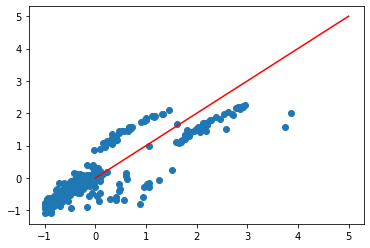

In [19]:
#使用plot scatter劃出y_test與predictions_test的關係
plt.scatter(y_test,predictions_test)
plt.plot([0,5],[0,5],'r')

# Step 10: 模型表現 - 準確度 Accuracy

In [20]:
#模型表現
score_train = regr.score(X_train, y_train)
print('Train Accuracy :' + str(score_train * 100) + '%')
score_test = regr.score(X_test, y_test)
print('Test Accuracy :' + str(score_test * 100) + '%')

Train Accuracy :73.58075267382283%
Test Accuracy :78.0095696440481%


# Step 11: 檢視模型係數與截距 Coeficient & Interception¶

In [21]:
#線性回歸函數斜率與截距
print('Coefficients: ', regr.coef_)
print('interception: ', regr.intercept_)
print(X.columns)

Coefficients:  [ 3.01369141e-01  1.39942885e-01  3.80817043e-02 -7.52143186e-04
  7.52143186e-04 -9.90161799e-01  9.90161799e-01]
interception:  0.5545719635158158
Index(['age', 'bmi', 'children', 'female', 'male', 'no', 'yes'], dtype='object')


# Step 12: 給予任意值觀察模型預測結果¶

In [22]:
#給任意值觀察模型預測
col=X.columns[:]
df2 = pd.DataFrame(np.array([[1,1,0,1,0,1,0],[1,1,0,1,0,0,1],[1,1,0,0,1,1,0],[1,1,0,0,1,0,1]]), columns=col)
df2

,age,bmi,children,female,male,no,yes
0,1,1,0,1,0,1,0
1,1,1,0,1,0,0,1
2,1,1,0,0,1,1,0
3,1,1,0,0,1,0,1


In [23]:
#結果預測
predict = pd.DataFrame(regr.predict(df2),columns=['predict'])
data_test = pd.concat([predict,df2],axis=1)
data_test

,predict,age,bmi,children,female,male,no,yes
0,0.004970,1,1,0,1,0,1,0
1,1.985294,1,1,0,1,0,0,1
2,0.006474,1,1,0,0,1,1,0
3,1.986798,1,1,0,0,1,0,1
